# Comparing models with and without Augmentation

In [6]:
# Importing necessary modules
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2024-08-10 20:41:25.745779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-10 20:41:26.432554: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-10 20:41:26.436262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-10 20:41:28.474062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
# Generating testing dataset for comparison of ROC curves
image_size = (224, 224)

batch_size = 10

test_ds = keras.utils.image_dataset_from_directory(
    "test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 202 files belonging to 2 classes.


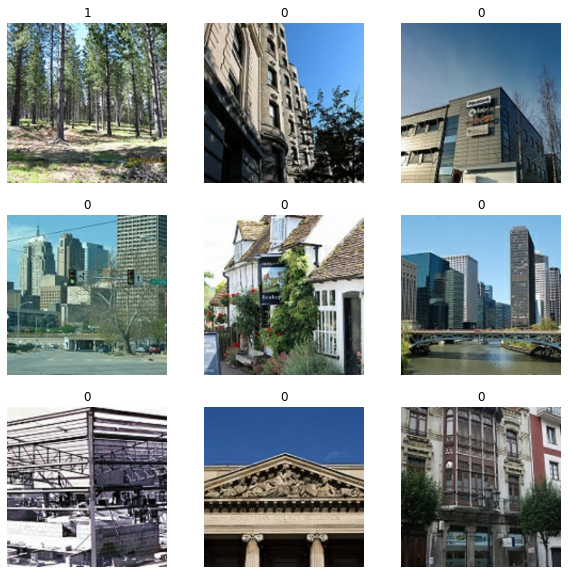

In [9]:
# Visualizing testing images
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [10]:
# Loading  train/val data from custom module and defining image size
import data_loader

image_size = (224, 224)
train_ds, val_ds = data_loader.load_data()

Found 202 files belonging to 2 classes.
Using 162 files for training.
Using 40 files for validation.


### Base Model without Augmentation

In [51]:
# Loading first model without augmentation
model = keras.models.load_model('base_model.keras')

In [52]:
pred = model.predict(test_ds)

21/21 [==============================] - 11s 508ms/step


In [53]:
pred

array([[-0.3028901 ],
       [-0.31013143],
       [-0.31719372],
       [-0.30575025],
       [-0.2902743 ],
       [-0.31325296],
       [-0.31070969],
       [-0.3083229 ],
       [-0.3083051 ],
       [-0.2914845 ],
       [-0.30867818],
       [-0.3090755 ],
       [-0.31186625],
       [-0.29281196],
       [-0.3186824 ],
       [-0.29549292],
       [-0.28550008],
       [-0.2846429 ],
       [-0.30351448],
       [-0.29742077],
       [-0.30323425],
       [-0.2977167 ],
       [-0.31294167],
       [-0.31062353],
       [-0.3021419 ],
       [-0.2930348 ],
       [-0.3097411 ],
       [-0.31235772],
       [-0.30619106],
       [-0.32540962],
       [-0.3068815 ],
       [-0.3145208 ],
       [-0.29665384],
       [-0.3092123 ],
       [-0.3116739 ],
       [-0.31413355],
       [-0.30345765],
       [-0.29597086],
       [-0.3102853 ],
       [-0.2951398 ],
       [-0.3110129 ],
       [-0.31276843],
       [-0.32159814],
       [-0.3042647 ],
       [-0.31509992],
       [-0

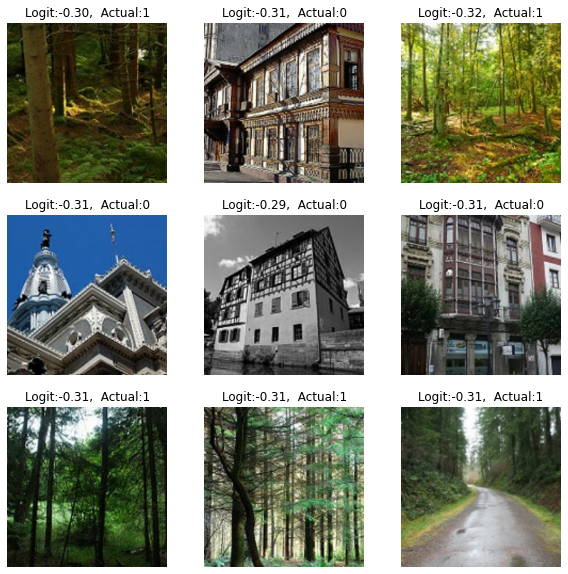

In [54]:
# Comparing logit value and class for first 9 images
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(f'Logit:{pred.ravel()[i]:.2f},  Actual:{int(labels[i])}')
        plt.axis("off")

In [55]:
# Retrieving images labels
image_labels = np.concatenate([y for x, y in test_ds], axis=0)
image_labels

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1], dtype=int32)

In [56]:
# Calculating TPR, FPR, and AUC for ROC curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(image_labels, pred)
auc = metrics.auc(fpr, tpr)

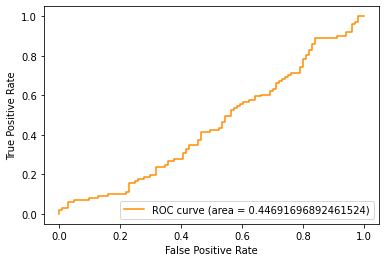

In [57]:
# Plotting ROC curve for first model
plt.plot(fpr,tpr,color='darkorange',label=f'ROC curve (area = {auc})')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Base Model with Augmentation

In [59]:
# Loading first model without augmentation
model2 = keras.models.load_model('base_model_aug.keras')

In [60]:
pred2 = model2.predict(test_ds)

21/21 [==============================] - 31s 1s/step


In [61]:
# Calculating TPR, FPR, and AUC for ROC curve
fpr, tpr, thresholds = metrics.roc_curve(image_labels, pred2)
auc2 = metrics.auc(fpr, tpr)

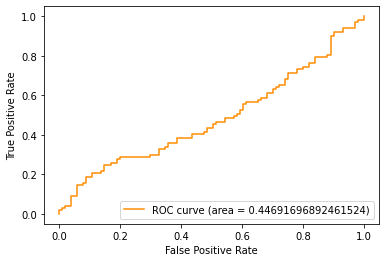

In [62]:
# Plotting ROC curve for second model
plt.plot(fpr,tpr,color='darkorange',label=f'ROC curve (area = {auc})')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()